<a href="https://colab.research.google.com/github/KJOELJOYSON2427/Stock_Prediction_LSTM/blob/main/Stock_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install -q yfinance

In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
plt.style.use('fivethirtyeight')

%matplotlib inline

In [74]:
import pandas as pd
import yfinance as yf
from datetime import datetime

tech_list = ['AAPL', 'GOOG', 'MSFT', 'AMZN']

end = datetime.now()
start = datetime(end.year - 1, end.month, end.day)

# Download
company_data = {stock: yf.download(stock, start=start, end=end) for stock in tech_list}

# Combine horizontally → creates 2-level MultiIndex columns
df = pd.concat(company_data, axis=1)


/tmp/ipython-input-1855580433.py:11: FutureWarning: YF.download() has changed argument auto_adjust default to True
  company_data = {stock: yf.download(stock, start=start, end=end) for stock in tech_list}
[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-1855580433.py:11: FutureWarning: YF.download() has changed argument auto_adjust default to True
  company_data = {stock: yf.download(stock, start=start, end=end) for stock in tech_list}
[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-1855580433.py:11: FutureWarning: YF.download() has changed argument auto_adjust default to True
  company_data = {stock: yf.download(stock, start=start, end=end) for stock in tech_list}
[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-1855580433.py:11: FutureWarning: YF.download() has changed argument auto_adjust default to True
  company_data = {stock: yf.download(stock, start=start, end=en

In [75]:
type(df)


pandas.core.frame.DataFrame

In [77]:
df.columns = df.columns.droplevel(2)



In [80]:
df[('AAPL', 'Close')]


,AAPL
,Close
Date,
2024-11-18,226.993362
2024-11-19,227.252197
2024-11-20,227.968948
2024-11-21,227.491119
2024-11-22,228.835037
...,...
2025-11-11,275.250000
2025-11-12,273.470001


In [7]:
company_data['GOOG'].head()

Price,Close,High,Low,Open,Volume,company_name
Ticker,GOOG,GOOG,GOOG,GOOG,GOOG,
Date,,,,,,
2024-11-18,176.029572,176.139093,173.659938,174.192610,18662800,GOOGLE
2024-11-19,178.797440,179.384865,174.352888,174.471373,15392900,GOOGLE
2024-11-20,176.557266,178.329508,174.565981,178.050730,15729800,GOOGLE
2024-11-21,168.502518,174.814887,164.589635,174.690431,38839400,GOOGLE
2024-11-22,165.844177,167.531783,164.987924,166.431603,24497000,GOOGLE


In [8]:
company_data['AAPL'].info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 250 entries, 2024-11-18 to 2025-11-17
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   (Close, AAPL)     250 non-null    float64
 1   (High, AAPL)      250 non-null    float64
 2   (Low, AAPL)       250 non-null    float64
 3   (Open, AAPL)      250 non-null    float64
 4   (Volume, AAPL)    250 non-null    int64  
 5   (company_name, )  250 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 13.7+ KB


In [9]:
company_data['AAPL'].isnull().sum()

,,0
Price,Ticker,
Close,AAPL,0
High,AAPL,0
Low,AAPL,0
Open,AAPL,0
Volume,AAPL,0
company_name,,0


In [29]:
company_data

{'AAPL': Price            Close        High         Low        Open    Volume  \
 Ticker            AAPL        AAPL        AAPL        AAPL      AAPL   
 Date                                                                   
 2024-11-18  226.993347  228.705604  224.156173  224.235815  44633700   
 2024-11-19  227.252197  229.123738  225.639496  225.958047  36211800   
 2024-11-20  227.968948  228.894754  224.872950  227.033178  35169600   
 2024-11-21  227.491104  229.123719  224.693758  227.849484  42108300   
 2024-11-22  228.835022  229.681201  227.033174  227.033174  38168300   
 ...                ...         ...         ...         ...       ...   
 2025-11-11  275.250000  275.910004  269.799988  269.809998  46208300   
 2025-11-12  273.470001  275.730011  271.700012  275.000000  48398000   
 2025-11-13  272.950012  276.700012  272.089996  274.109985  49602800   
 2025-11-14  272.410004  275.959991  269.600006  271.049988  47431300   
 2025-11-17  267.459991  270.489990  265.73

In [28]:
company_list= [company_data[ticker] for ticker in tech_list]
company_list[0]

Price,Close,High,Low,Open,Volume,company_name,MA_10_days,MA_20_days,MA_50_days,Daily Return
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL,,,,,
Date,,,,,,,,,,
2024-11-18,226.993347,228.705604,224.156173,224.235815,44633700,APPLE,NaN,NaN,NaN,NaN
2024-11-19,227.252197,229.123738,225.639496,225.958047,36211800,APPLE,NaN,NaN,NaN,0.001140
2024-11-20,227.968948,228.894754,224.872950,227.033178,35169600,APPLE,NaN,NaN,NaN,0.003154
2024-11-21,227.491104,229.123719,224.693758,227.849484,42108300,APPLE,NaN,NaN,NaN,-0.002096
2024-11-22,228.835022,229.681201,227.033174,227.033174,38168300,APPLE,NaN,NaN,NaN,0.005908
...,...,...,...,...,...,...,...,...,...,...
2025-11-11,275.250000,275.910004,269.799988,269.809998,46208300,APPLE,270.152911,264.588404,253.673248,0.021601
2025-11-12,273.470001,275.730011,271.700012,275.000000,48398000,APPLE,270.556030,265.806978,254.377867,-0.006467


In [27]:
df.columns



MultiIndex([(       'Close', 'AAPL'),
            (        'High', 'AAPL'),
            (         'Low', 'AAPL'),
            (        'Open', 'AAPL'),
            (      'Volume', 'AAPL'),
            ('company_name',     ''),
            (       'Close', 'GOOG'),
            (        'High', 'GOOG'),
            (         'Low', 'GOOG'),
            (        'Open', 'GOOG'),
            (      'Volume', 'GOOG'),
            (       'Close', 'MSFT'),
            (        'High', 'MSFT'),
            (         'Low', 'MSFT'),
            (        'Open', 'MSFT'),
            (      'Volume', 'MSFT'),
            (       'Close', 'AMZN'),
            (        'High', 'AMZN'),
            (         'Low', 'AMZN'),
            (        'Open', 'AMZN'),
            (      'Volume', 'AMZN')],
           names=['Price', 'Ticker'])

In [11]:
plt.figure(figsize=(15, 10
                    ))
plt.subplots_adjust(top=1.25, bottom=1.2)

<Figure size 1500x1000 with 0 Axes>

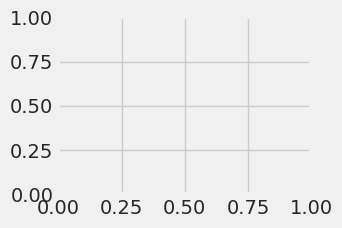

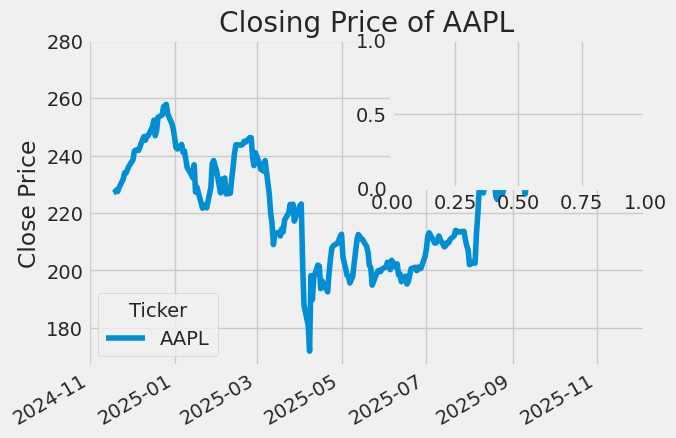

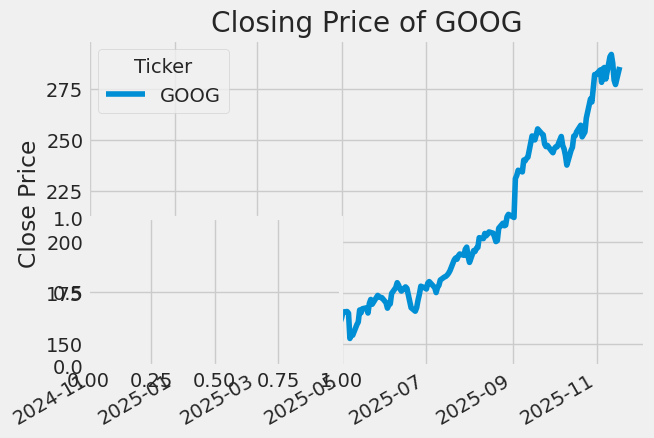

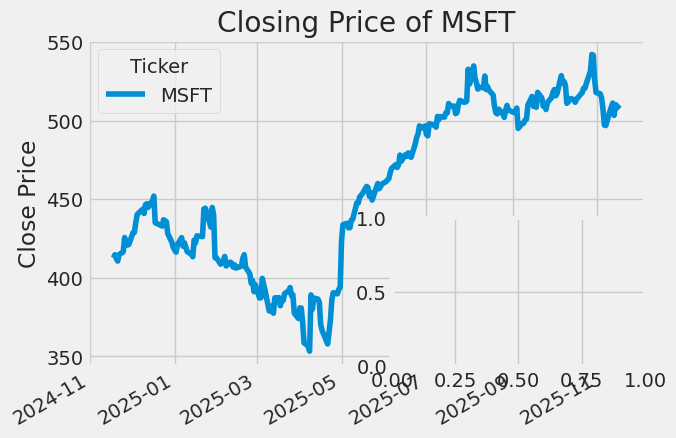

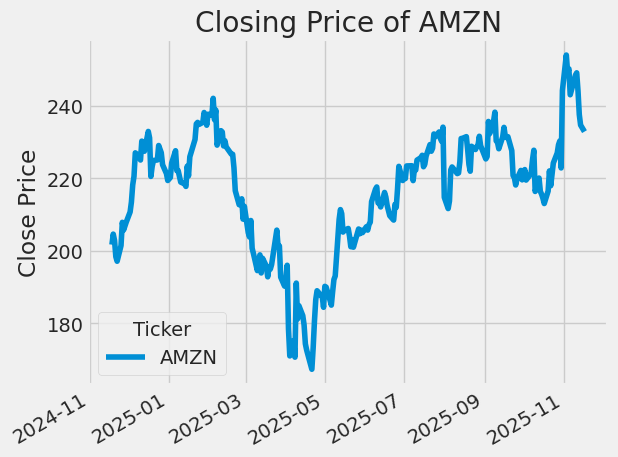

In [12]:

for i, (ticker, company) in enumerate(zip(tech_list, company_list),1):
  plt.subplot(2, 2, i)
  company['Close'].plot()  # ✅ changed from 'Adj Close' to 'Close'
  plt.ylabel('Close Price')
  plt.xlabel(None)
  plt.title(f"Closing Price of {ticker}")
plt.tight_layout()
plt.show()

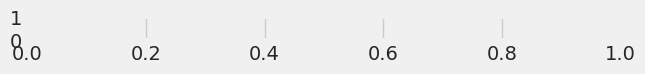

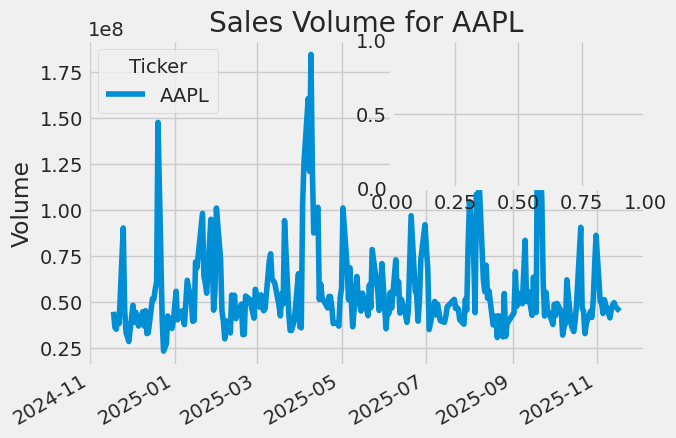

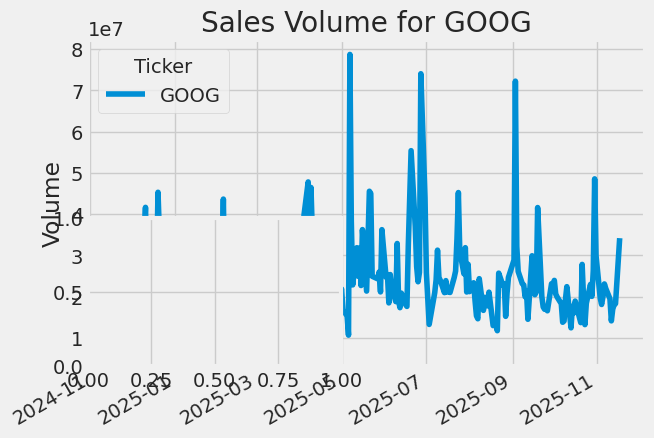

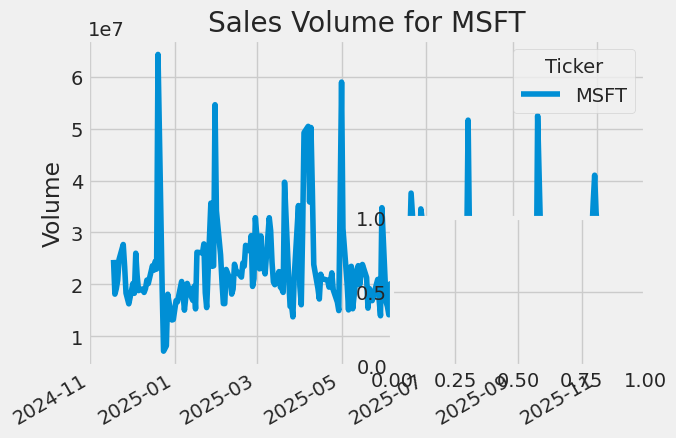

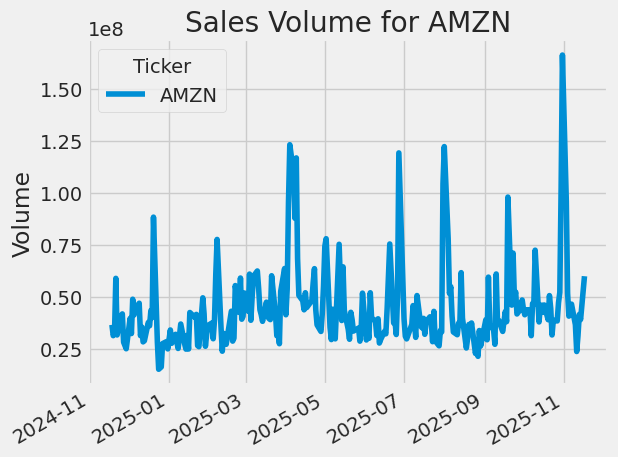

In [13]:
# Now let's plot the total volume of stock being traded each day
plt.figure(figsize=(15, 10))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, (ticker, company) in enumerate(zip(tech_list, company_list),1):
  plt.subplot(2, 2, i)
  company['Volume'].plot()  # ✅ changed from 'Adj Close' to 'Close'
  plt.ylabel('Volume')
  plt.xlabel(None)
  plt.title(f"Sales Volume for {ticker}")
plt.tight_layout()
plt.show()

# What was the moving average of the various stocks?

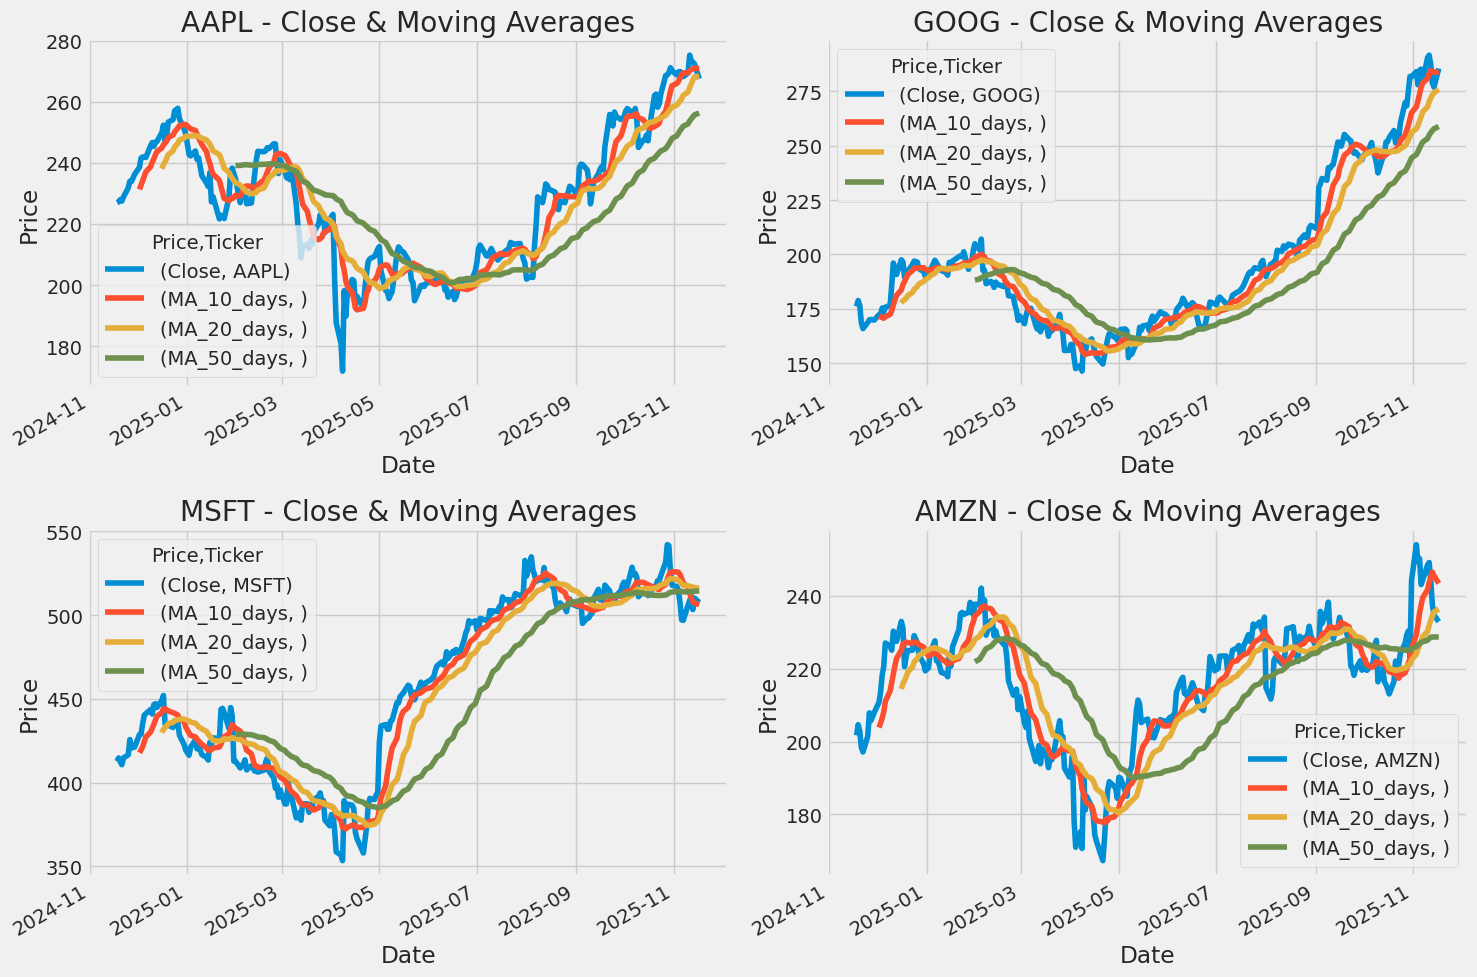

In [14]:
import matplotlib.pyplot as plt

# Calculate Moving Averages (MA)
ma_days = [10, 20, 50]
for ma in ma_days:
    for ticker in tech_list:
        column_name = f"MA_{ma}_days"
        company_data[ticker][column_name] = company_data[ticker]['Close'].rolling(window=ma).mean()

# Create subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))

# Plot each company with its moving averages
for ax, ticker in zip(axes.flat, tech_list):
    company_data[ticker][['Close', 'MA_10_days', 'MA_20_days', 'MA_50_days']].plot(ax=ax)
    ax.set_title(f"{ticker} - Close & Moving Averages")
    ax.set_xlabel("Date")
    ax.set_ylabel("Price")

plt.tight_layout()
plt.show()


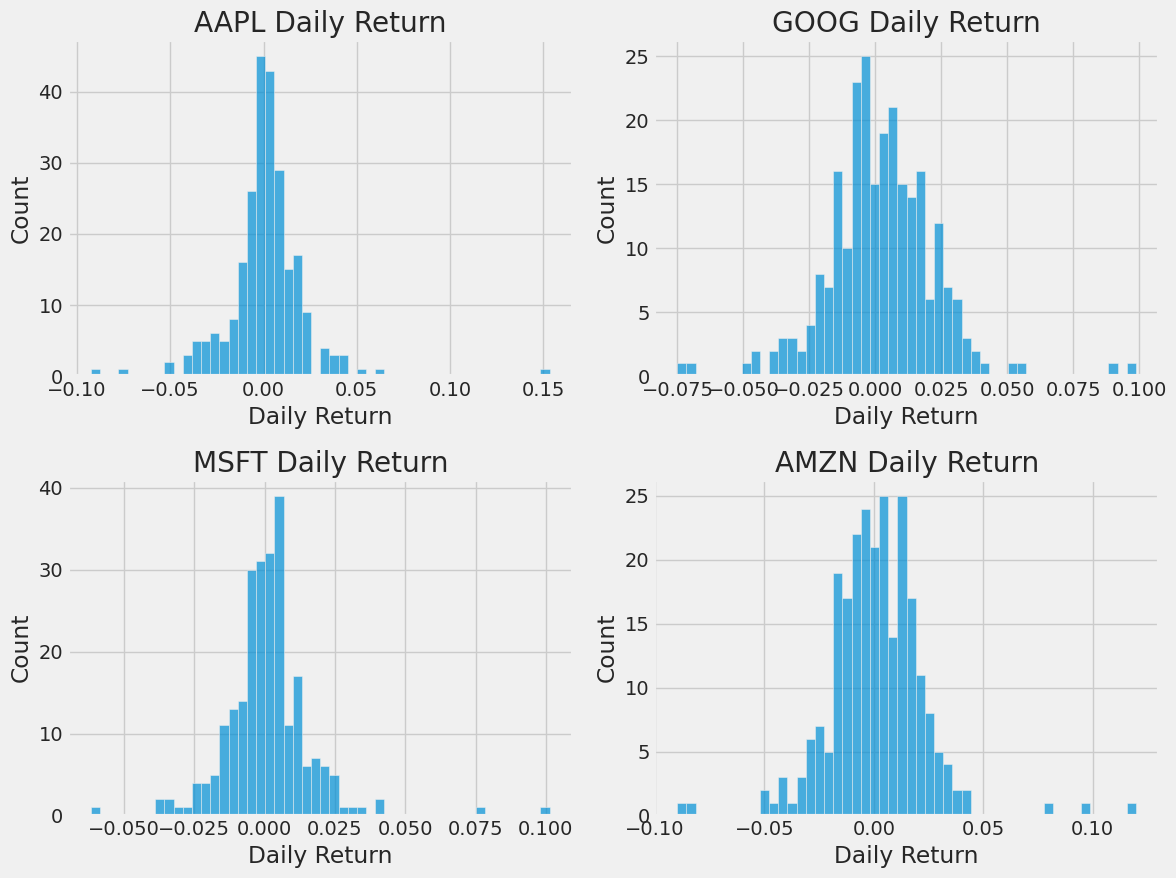

In [15]:
import matplotlib.pyplot as plt

# Calculate Daily Return for each company
for ticker in tech_list:
    company_data[ticker]['Daily Return'] = company_data[ticker]['Close'].pct_change()

# Plot histograms of Daily Returns
plt.figure(figsize=(12, 9))

for i, ticker in enumerate(tech_list, 1):
    plt.subplot(2, 2, i)
    company_data[ticker]['Daily Return'].hist(bins=50, alpha=0.7)
    plt.xlabel('Daily Return')
    plt.ylabel('Count')
    plt.title(f'{ticker} Daily Return')

plt.tight_layout()
plt.show()


In [16]:
closing_prices_dict ={
    ticker: company_data[ticker][('Close', ticker)] for ticker in tech_list
}

print(closing_prices_dict.items())

dict_items([('AAPL', Date
2024-11-18    226.993347
2024-11-19    227.252197
2024-11-20    227.968948
2024-11-21    227.491104
2024-11-22    228.835022
                 ...    
2025-11-11    275.250000
2025-11-12    273.470001
2025-11-13    272.950012
2025-11-14    272.410004
2025-11-17    267.459991
Name: (Close, AAPL), Length: 250, dtype: float64), ('GOOG', Date
2024-11-18    176.029572
2024-11-19    178.797440
2024-11-20    176.557266
2024-11-21    168.502518
2024-11-22    165.844177
                 ...    
2025-11-11    291.739990
2025-11-12    287.429993
2025-11-13    279.119995
2025-11-14    276.980011
2025-11-17    285.600006
Name: (Close, GOOG), Length: 250, dtype: float64), ('MSFT', Date
2024-11-18    412.661926
2024-11-19    414.676788
2024-11-20    412.393951
2024-11-21    410.613739
2024-11-22    414.721161
                 ...    
2025-11-11    508.679993
2025-11-12    511.140015
2025-11-13    503.290009
2025-11-14    510.179993
2025-11-17    507.489990
Name: (Close, MSFT)

In [17]:
closing_df=pd.DataFrame(closing_prices_dict)
tech_rets=closing_df.pct_change()
tech_rets.head()

,AAPL,GOOG,MSFT,AMZN
Date,,,,
2024-11-18,NaN,NaN,NaN,NaN
2024-11-19,0.001140,0.015724,0.004883,0.014427
2024-11-20,0.003154,-0.012529,-0.005505,-0.008455
2024-11-21,-0.002096,-0.045621,-0.004317,-0.022181
2024-11-22,0.005908,-0.015776,0.010003,-0.006351


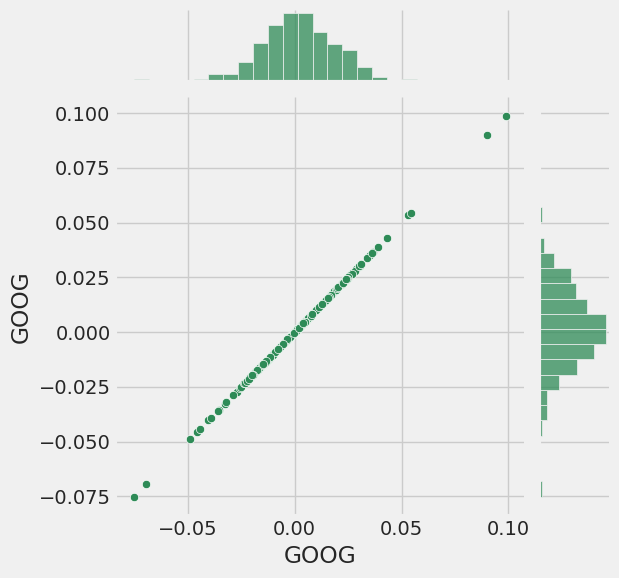

In [18]:
sns.jointplot(x='GOOG', y='GOOG', data=tech_rets, kind="scatter" , color="seagreen")

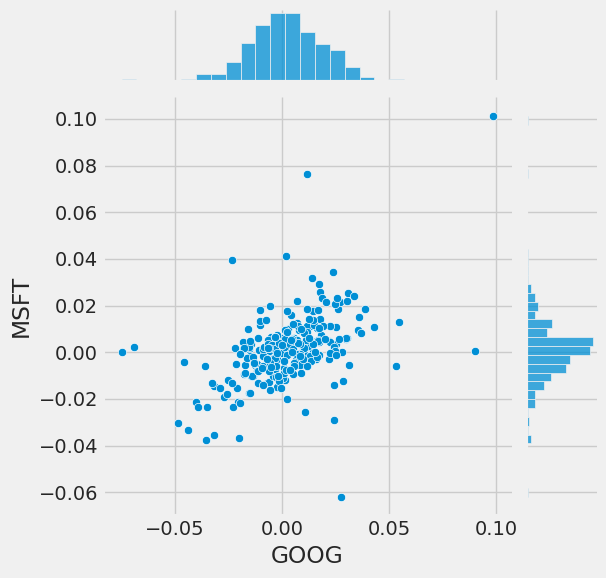

In [19]:
#We'll use joinplot to compare the daily returns of Google and Microsoft
sns.jointplot(x='GOOG', y='MSFT', data=tech_rets, kind='scatter')

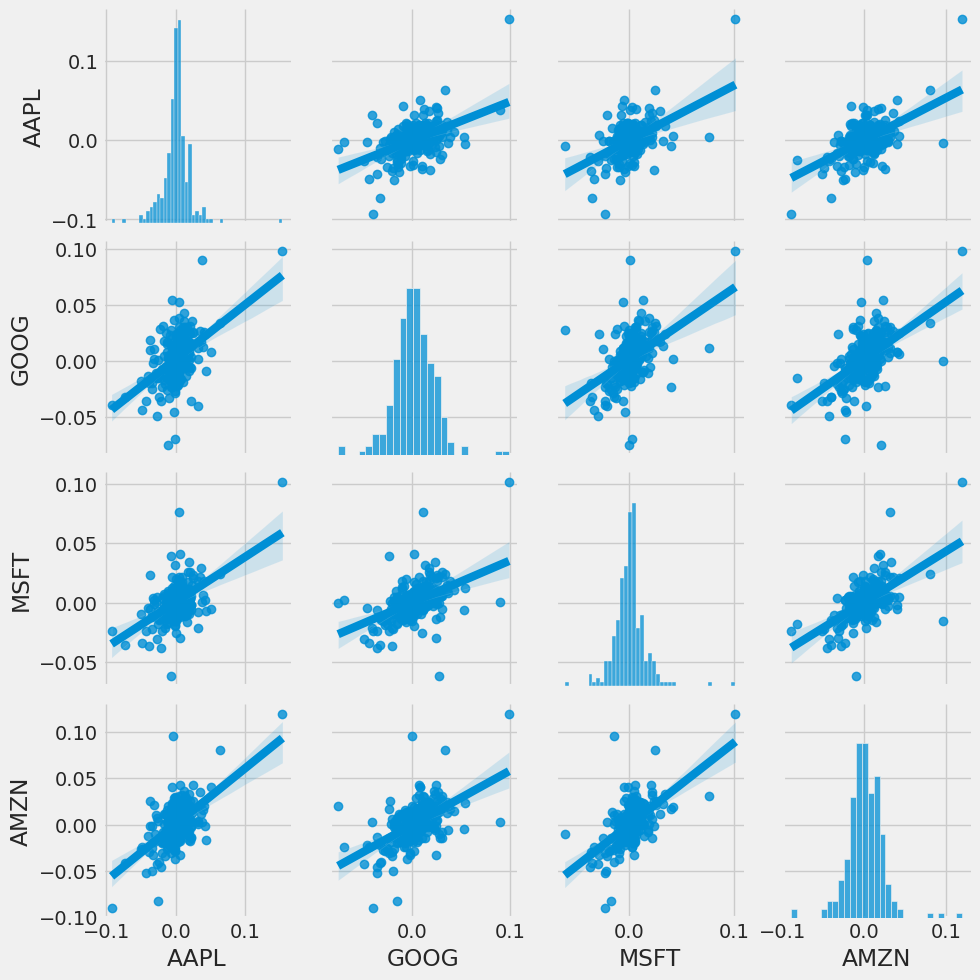

In [20]:
sns.pairplot(tech_rets, kind='reg')

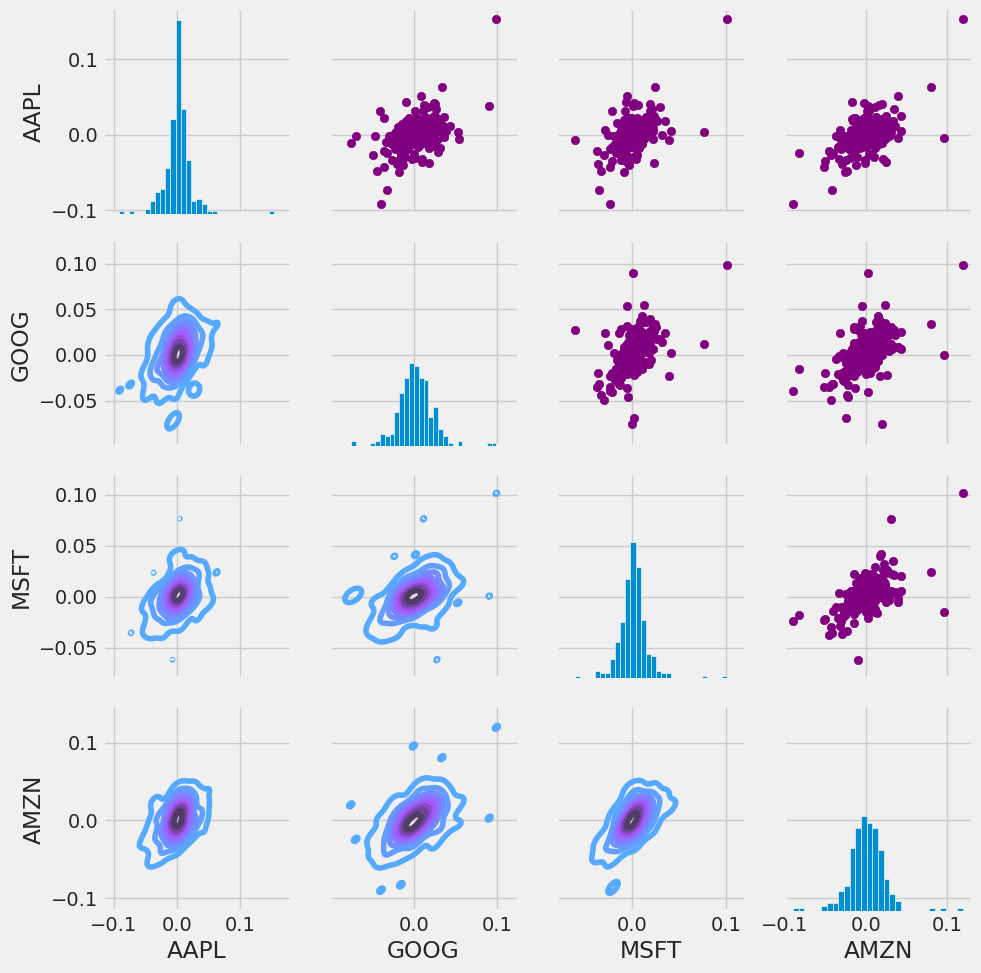

In [21]:
return_fig = sns.PairGrid(tech_rets.dropna())

# Using map_upper we can specify what the upper triangle will look like.
return_fig.map_upper(plt.scatter, color='purple')
# We can also define the lower triangle in the figure, inclufing the plot type (kde)
# or the color map (BluePurple)
return_fig.map_lower(sns.kdeplot, cmap='cool_d')

# Finally we'll define the diagonal as a series of histogram plots of the daily return
return_fig.map_diag(plt.hist, bins=30)

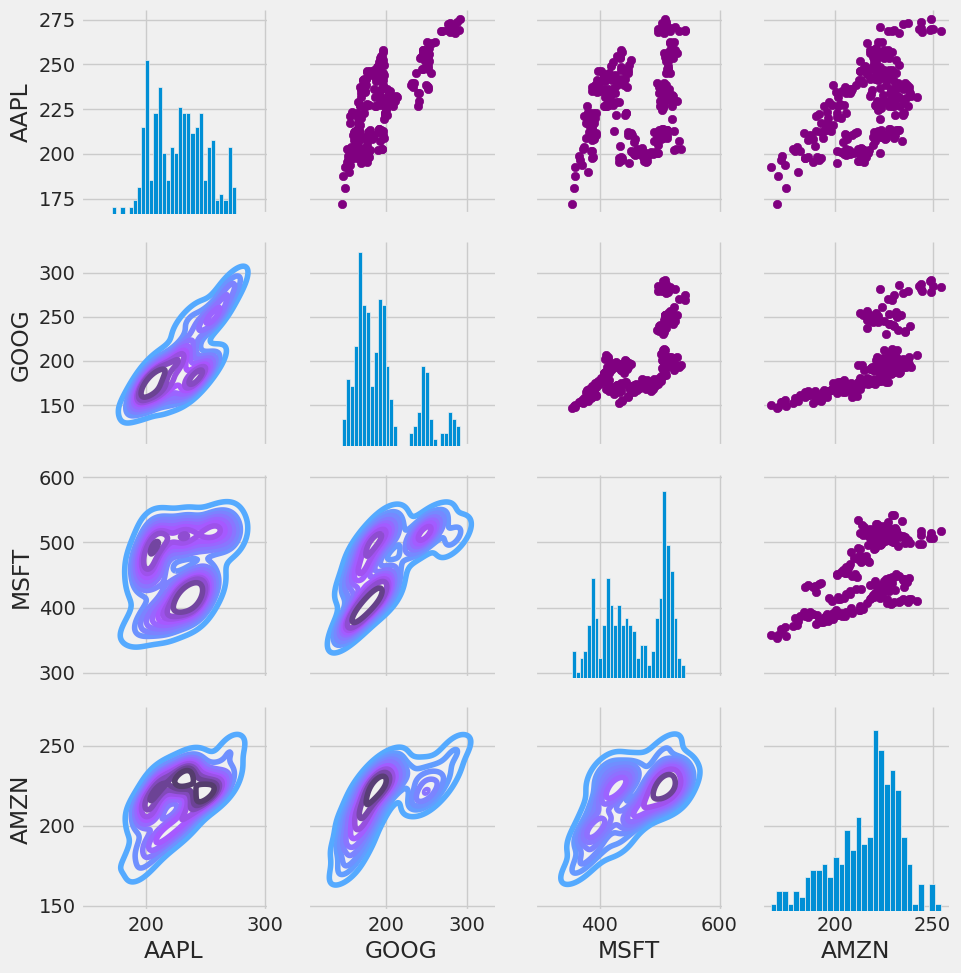

In [22]:
# Set up our figure by naming it returns_fig, call PairPLot on the DataFrame
returns_fig = sns.PairGrid(closing_df)

# Using map_upper we can specify what the upper triangle will look like.
returns_fig.map_upper(plt.scatter,color='purple')

# We can also define the lower triangle in the figure, inclufing the plot type (kde) or the color map (BluePurple)
returns_fig.map_lower(sns.kdeplot,cmap='cool_d')

# Finally we'll define the diagonal as a series of histogram plots of the daily return
returns_fig.map_diag(plt.hist,bins=30)

Text(0.5, 1.0, 'Correlation of Stock Closing Prices')

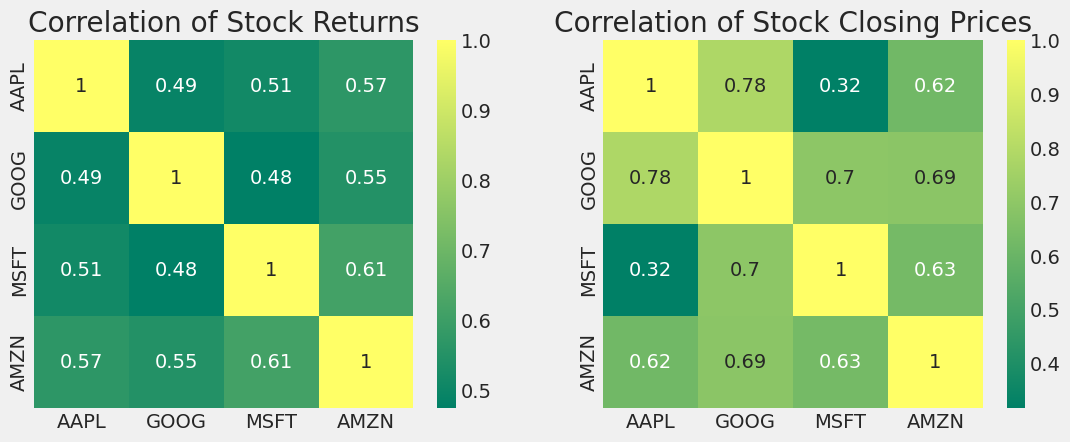

In [23]:
plt.figure(figsize=(12, 10))
plt.subplot(2,2,1)
sns.heatmap(tech_rets.corr(), annot=True, cmap="summer")
plt.title('Correlation of Stock Returns')

plt.subplot(2, 2, 2)
sns.heatmap(closing_df.corr(), annot=True, cmap='summer')
plt.title('Correlation of Stock Closing Prices')

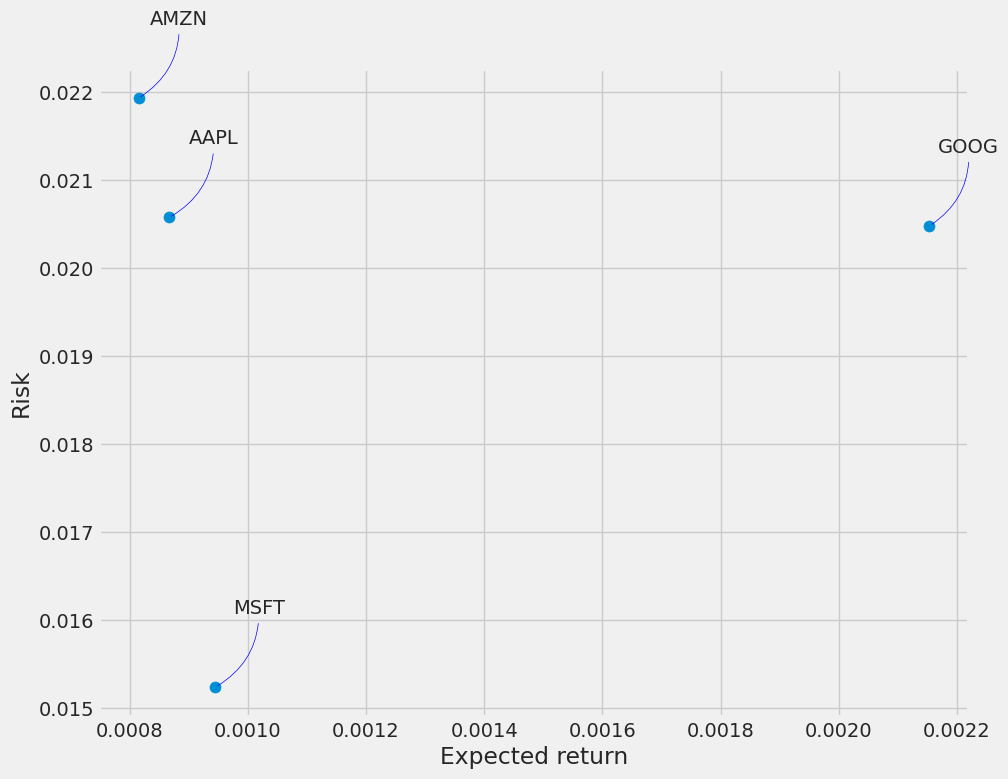

In [24]:
rets = tech_rets.dropna()
area = np.pi * 20
plt.figure(figsize=(10, 8))
plt.scatter(rets.mean(), rets.std(), s=area)
plt.xlabel('Expected return')
plt.ylabel('Risk')
for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(label, xy=(x, y), xytext=(50, 50), textcoords='offset points',
                 ha='right', va='bottom',
                 arrowprops={'arrowstyle':'-', 'color':'blue', 'connectionstyle':'arc3,rad=-0.3'})

In [25]:
rets.std()

,0
AAPL,0.020577
GOOG,0.020481
MSFT,0.015235
AMZN,0.021935


# Predicting the closing price stock price of APPLE inc:

In [87]:
app=df.loc[:, ('AAPL')]



In [88]:
app

Price,Close,High,Low,Open,Volume
Date,,,,,
2024-11-18,226.993362,228.705619,224.156188,224.235830,44633700
2024-11-19,227.252197,229.123738,225.639496,225.958047,36211800
2024-11-20,227.968948,228.894754,224.872950,227.033178,35169600
2024-11-21,227.491119,229.123735,224.693774,227.849499,42108300
2024-11-22,228.835037,229.681216,227.033189,227.033189,38168300
...,...,...,...,...,...
2025-11-11,275.250000,275.910004,269.799988,269.809998,46208300
2025-11-12,273.470001,275.730011,271.700012,275.000000,48398000
2025-11-13,272.950012,276.700012,272.089996,274.109985,49602800


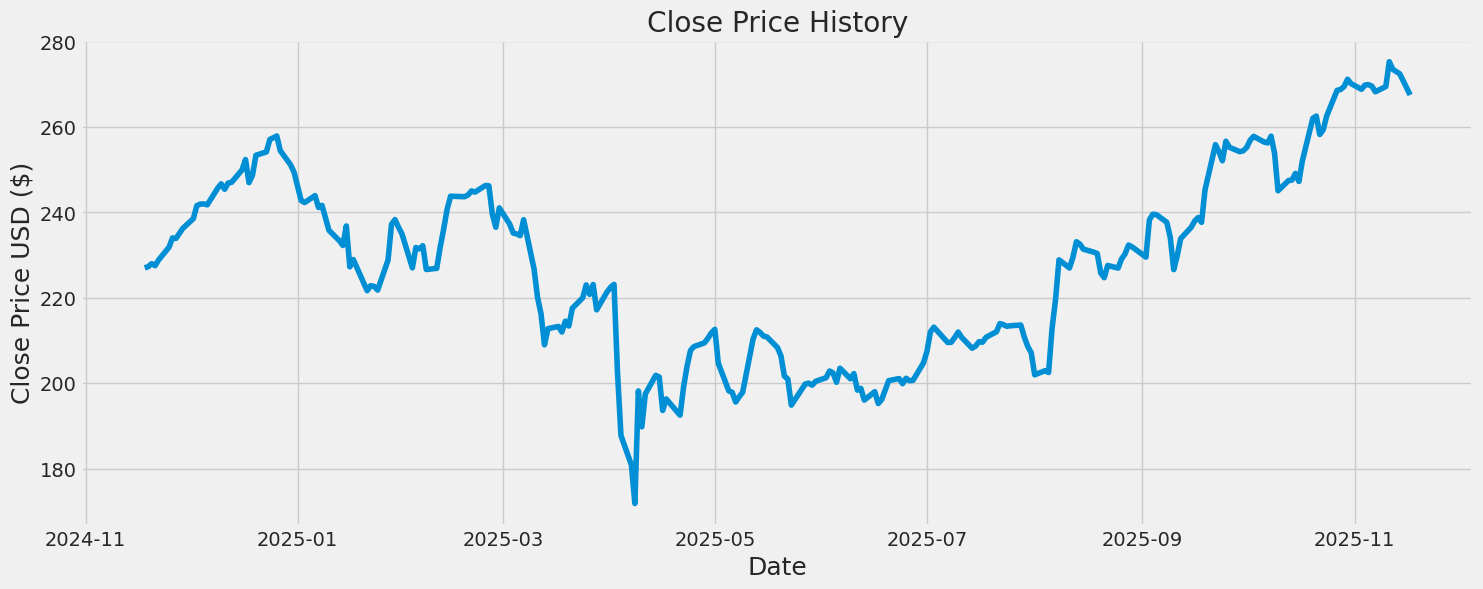

In [89]:
plt.figure(figsize=(16,6))
plt.title('Close Price History')
plt.plot(app['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

In [90]:
app.index

DatetimeIndex(['2024-11-18', '2024-11-19', '2024-11-20', '2024-11-21',
               '2024-11-22', '2024-11-25', '2024-11-26', '2024-11-27',
               '2024-11-29', '2024-12-02',
               ...
               '2025-11-04', '2025-11-05', '2025-11-06', '2025-11-07',
               '2025-11-10', '2025-11-11', '2025-11-12', '2025-11-13',
               '2025-11-14', '2025-11-17'],
              dtype='datetime64[ns]', name='Date', length=250, freq=None)

In [94]:
data = app.filter(['Close'])
dataset = data.values

In [ ]:
dataset

In [100]:
training_data_len = int(np.ceil( len(dataset) * .95 ))
training_data_len

238

In [104]:
from sklearn.preprocessing  import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data= scaler.fit_transform(dataset)
scaled_data

np.float64(0.5333806757403166)

In [109]:
train_data = scaled_data[0:int(training_data_len),:]

In [117]:
# Split the data into x_train and y_train data sets
x_train = []
y_train = []


In [ ]:
for i in range(60, len(train_data)):
  x_train.append(train_data[i-60:i,0])
  y_train.append(train_data[i, 0])
  if i<= 61:
        print(x_train)
        print(y_train)
        print()

In [120]:
# Convert the x_train and y_train to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)

In [121]:
x_train.shape

(356, 60)

In [123]:
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

(356, 60, 1)

In [128]:
x_train

array([[[0.53338068],
        [0.53588349],
        [0.54281414],
        ...,
        [0.62107769],
        [0.66598417],
        [0.6955685 ]],

       [[0.53588349],
        [0.54281414],
        [0.53819375],
        ...,
        [0.66598417],
        [0.6955685 ],
        [0.69431584]],

       [[0.54281414],
        [0.53819375],
        [0.55118882],
        ...,
        [0.6955685 ],
        [0.69431584],
        [0.69817032]],

       ...,

       [[0.30062925],
        [0.29647998],
        [0.39615635],
        ...,
        [0.84604727],
        [0.87734667],
        [0.93521074]],

       [[0.29647998],
        [0.39615635],
        [0.46157814],
        ...,
        [0.87734667],
        [0.93521074],
        [0.93704621]],

       [[0.39615635],
        [0.46157814],
        [0.55150884],
        ...,
        [0.93521074],
        [0.93704621],
        [0.94380851]]])